# <font color='LightBlue'> **Transportation Model**</font>

<font color='Silver'>
Kevin Schaaf ()
Haron Malash ()
Sanjhana Bhusal ()
Martijn Messanella ()
Lisa Pahladsingh ()
</font>

19 200 0.095
19
20 200 0.1
20
18 200 0.09
18
14 200 0.07
14
14 200 0.07
14
10 200 0.05
10
9 200 0.045
9
21 200 0.105
21
24 200 0.12
24
19 200 0.095
19
18 200 0.09
18
14 200 0.07
14
13 200 0.065
13
11 200 0.055
11
23 200 0.115
23
18 200 0.09
18
9 200 0.045
9
18 200 0.09
18
20 200 0.1
20
12 200 0.06
12
21 200 0.105
21
17 200 0.085
17
20 200 0.1
20
18 200 0.09
18
19 200 0.095
19
20 200 0.1
20
16 200 0.08
16
21 200 0.105
21
14 200 0.07
14
21 200 0.105
21
10 200 0.05
10
21 200 0.105
21
11 200 0.055
11
14 200 0.07
14
19 200 0.095
19
14 200 0.07
14
20 200 0.1
20
23 200 0.115
23
17 200 0.085
17
5 200 0.025
5
26 200 0.13
26
16 200 0.08
16
20 200 0.1
20
13 200 0.065
13
19 200 0.095
19
13 200 0.065
13
16 200 0.08
16
12 200 0.06
12
17 200 0.085
17
17 200 0.085
17
13 200 0.065
13
15 200 0.075
15
15 200 0.075
15
23 200 0.115
23
12 200 0.06
12
17 200 0.085
17
18 200 0.09
18
20 200 0.1
20
12 200 0.06
12
21 200 0.105
21
19 200 0.095
19
19 200 0.095
19
13 200 0.065
13
20 200 0.1
20
27 200 0.135
27
16 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


29 200 0.145
29
19 200 0.095
19
5 200 0.025
5
7 200 0.035
7
30 200 0.15
30
25 200 0.125
25
13 200 0.065
13
11 200 0.055
11
24 200 0.12
24
24 200 0.12
24
6 200 0.03
6
7 200 0.035
7


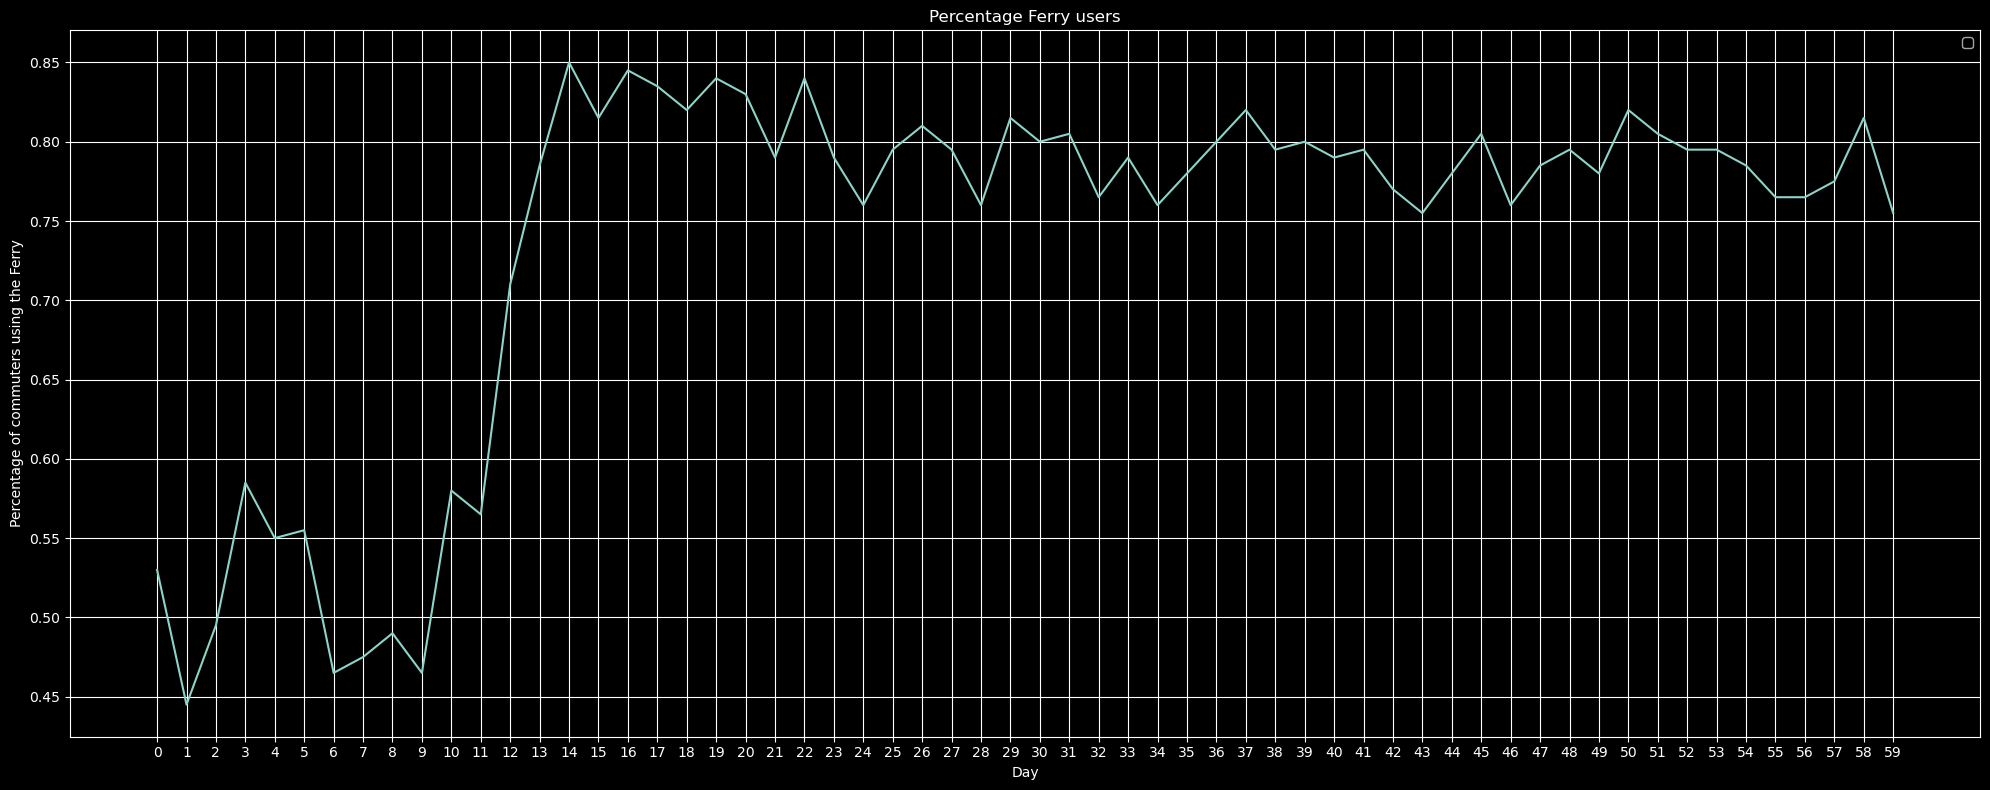

In [1]:
from Simulate import *
import matplotlib.pyplot as plt

plt.style.use('default')

## <font color='LightGreen'> ***Price***</font>
Sanjhana

In [ ]:
def ferry_price_policy(num_commuters, islands, fares, metrics_to_plot):

    for fare in fares: 
        
        simulation = Simulation(
            num_commuters=num_commuters,
            num_days=60,
            islands=islands,
            capacity=1000,
            ferry_base_price=fare,
            ferry_base_time=40,
            speedboat_base_price=6,
            speedboat_base_time=10,
        )

        simulation.run()
        simulation.plot_specific_results(metrics_to_plot)

In [ ]:
islands = ["Island_A", "Island_B"]
num_commuters = 1000

fares = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Plot specific results
metrics_to_plot = [
    'Ferry_Island_A_Island_B_users',
    'Ferry_Island_B_Island_A_users'
    ]

ferry_price_policy(num_commuters, islands, fares, metrics_to_plot)


Het lijkt er op alsof er minder schommeling is bij een hogere prijzen, maar de percentage ferry gebruikers neemt wel duidelijk af bij een toename in prijs.

## <font color='LightGreen'> ***Capacity***</font>
Kevin

In [4]:
def vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price):
    '''
    This function executes the capacity experiment. 
    args:
        num_commuters:   The number of agents in the model
        islands:         The names of the islands included in the model
        capacities:      A list or array of integers, with the lowest integer the number of agents
        metrics_to_plot: A list of all the metrics you want to plot; 
                         This should be a list of strings with the names of the metrics.
                         Also, this variable might need adjustment for different number of islands
    Output:
        Plot of the percentage of ferry users for this settings of the experiment. 
    '''
    simulation = Simulation(
        num_commuters=num_commuters,
        num_days=60,
        islands=islands,
        capacity=capacity,
        ferry_base_price=ferry_base_price,
        ferry_base_time=40,
        speedboat_base_price=6,
        speedboat_base_time=10,
    )

    simulation.run()

    # Plot specific results
    metrics_to_plot = [
        'Ferry_Island_A_Island_B_users',
        'Ferry_Island_B_Island_A_users', 
        'Speedboat_Island_A_Island_B_users', 
        'Speedboat_Island_B_Island_A_users'
    ]

    return simulation.return_percentage_ferry_users(metrics_to_plot)

232 1000 0.232
232
239 1000 0.239
239
266 1000 0.266
266
263 1000 0.263
263
260 1000 0.26
260
246 1000 0.246
246
242 1000 0.242
242
252 1000 0.252
252
268 1000 0.268
268
261 1000 0.261
261
230 1000 0.23
230
241 1000 0.241
241
244 1000 0.244
244
252 1000 0.252
252
258 1000 0.258
258
246 1000 0.246
246
302 1000 0.302
302
310 1000 0.31
310
196 1000 0.196
196
192 1000 0.192
192
300 1000 0.3
300
305 1000 0.305
305
202 1000 0.202
202
193 1000 0.193
193
280 1000 0.28
280
309 1000 0.309
309
218 1000 0.218
218
193 1000 0.193
193
306 1000 0.306
306
308 1000 0.308
308
196 1000 0.196
196
190 1000 0.19
190
286 1000 0.286
286
282 1000 0.282
282
212 1000 0.212
212
220 1000 0.22
220
268 1000 0.268
268
278 1000 0.278
278
234 1000 0.234
234
220 1000 0.22
220
283 1000 0.283
283
281 1000 0.281
281
215 1000 0.215
215
221 1000 0.221
221
294 1000 0.294
294
288 1000 0.288
288
208 1000 0.208
208
210 1000 0.21
210
286 1000 0.286
286
289 1000 0.289
289
212 1000 0.212
212
213 1000 0.213
213
294 1000 0.294
294
274

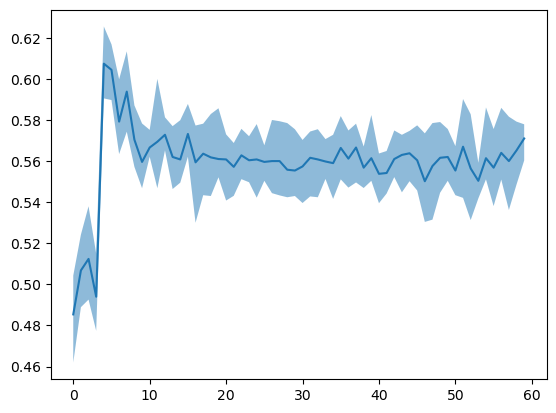

In [11]:
islands = ["Island_A", "Island_B"]
num_commuters = 1000
capacities = np.array((200, 400, 500, 600, 800, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 8000, 10000, 15000, 20000, 30000, 40000, 50000, 70000, 100000))
runs = 10
ferry_base_price = 1

num_days = 60
metrics_to_plot = [
    'Ferry_Island_A_Island_B_users',
    'Ferry_Island_B_Island_A_users', 
    'Speedboat_Island_A_Island_B_users', 
    'Speedboat_Island_B_Island_A_users'
]

percentages_ferry_users = np.zeros((num_days, runs))
CI = np.zeros((num_days, 2))
capacity = 1000


for i in range(runs):
    percentages_ferry_users[:, i] = vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price)

mean = np.mean(percentages_ferry_users, axis=1)
CI = np.percentile(percentages_ferry_users, [2.5, 97.5], axis=1).T

plt.figure()
plt.plot(mean)
plt.fill_between(np.arange(0, num_days, 1), CI[:, 0], CI[:, 1], alpha=0.5)
plt.show()

## <font color='LightGreen'> ***Number of Islands***</font>
Martijn